In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.compat.v1.keras.backend import set_session

sns.set()

In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device



In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16055244706897441108
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16350334588199943336
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5419289824
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12371992684721917474
physical_device_desc: "device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 4313146249004533402
physical_device_desc: "device: XLA_GPU device"
]


In [4]:
train_data ,valid_data ,test_data = tfds.load('cifar100',split=['train[:90%]','train[90%:]','test'])

In [5]:
def preprocessing(item):
    X = item['image']
    y = item['coarse_label']
    X = tf.image.resize_with_pad(X,224,224)
    return X,y

In [6]:
def configure_data(data):
    data = data.map(preprocessing)
    data = data.shuffle(buffer_size = 100)
    data = data.batch(32)
    data = data.prefetch(1)
    return data

In [7]:
train_data = configure_data(train_data)
valid_data = configure_data(valid_data)

In [8]:
for item in train_data.take(1):
    print(item)

(<tf.Tensor: shape=(64, 224, 224, 3), dtype=float32, numpy=
array([[[[243., 243., 253.],
         [243., 243., 253.],
         [243., 243., 253.],
         ...,
         [201., 217., 230.],
         [201., 217., 230.],
         [  0.,   0.,   0.]],

        [[243., 243., 253.],
         [243., 243., 253.],
         [243., 243., 253.],
         ...,
         [201., 217., 230.],
         [201., 217., 230.],
         [  0.,   0.,   0.]],

        [[243., 243., 253.],
         [243., 243., 253.],
         [243., 243., 253.],
         ...,
         [201., 217., 230.],
         [201., 217., 230.],
         [  0.,   0.,   0.]],

        ...,

        [[129., 116.,  94.],
         [129., 116.,  94.],
         [129., 116.,  94.],
         ...,
         [ 88.,  94.,  92.],
         [ 88.,  94.,  92.],
         [  0.,   0.,   0.]],

        [[129., 116.,  94.],
         [129., 116.,  94.],
         [129., 116.,  94.],
         ...,
         [ 88.,  94.,  92.],
         [ 88.,  94.,  92.],
       

In [17]:
import CNN_Models.LeNet5 as LeNet5
model_lenet = LeNet5.lenet_5(in_shape=[32, 32, 3], n_classes=100, opt='sgd')
model_lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
In (ZeroPadding2D)           (None, 36, 36, 3)         0         
_________________________________________________________________
C1 (Conv2D)                  (None, 32, 32, 6)         456       
_________________________________________________________________
S2 (AveragePooling2D)        (None, 16, 16, 6)         0         
_________________________________________________________________
C3 (Conv2D)                  (None, 12, 12, 16)        2416      
_________________________________________________________________
S4 (AveragePooling2D)        (None, 6, 6, 16)          0         
_________________________________________________________________
C5 (Conv2D)                  (None, 2, 2, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 480)               0

In [9]:
history_lenet = model_lenet.fit(train_data, epochs=30, validation_data=valid_data)

Epoch 1/30
2813/2813 [==============================] - 9s 3ms/step - loss: 2.8978 - accuracy: 0.1087 - val_loss: 2.7751 - val_accuracy: 0.1268
Epoch 2/30
2813/2813 [==============================] - 7s 2ms/step - loss: 2.7086 - accuracy: 0.1595 - val_loss: 2.6666 - val_accuracy: 0.1716
Epoch 3/30
2813/2813 [==============================] - 6s 2ms/step - loss: 2.6950 - accuracy: 0.1670 - val_loss: 2.6862 - val_accuracy: 0.1756
Epoch 4/30
2813/2813 [==============================] - 7s 3ms/step - loss: 2.5994 - accuracy: 0.2031 - val_loss: 2.5748 - val_accuracy: 0.2082
Epoch 5/30
2813/2813 [==============================] - 7s 3ms/step - loss: 2.5059 - accuracy: 0.2318 - val_loss: 2.4906 - val_accuracy: 0.2344
Epoch 6/30
2813/2813 [==============================] - 6s 2ms/step - loss: 2.4356 - accuracy: 0.2530 - val_loss: 2.4302 - val_accuracy: 0.2588
Epoch 7/30
2813/2813 [==============================] - 6s 2ms/step - loss: 2.3713 - accuracy: 0.2764 - val_loss: 2.4290 - val_accuracy:

In [18]:
import CNN_Models.ResNet34 as ResNet34
model_resnet34 = ResNet34.ResNet34(in_shape=[224,224,3], n_classes=100, opt='Adam')
model_resnet34.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
1_7x7_conv_64_2 (Conv2D)        (None, 112, 112, 64) 9472        input[0][0]                      
__________________________________________________________________________________________________
1_pool/2 (MaxPooling2D)         (None, 56, 56, 64)   0           1_7x7_conv_64_2[0][0]            
__________________________________________________________________________________________________
2_main_3x3_conv_64_1 (Conv2D)   (None, 56, 56, 64)   36928       1_pool/2[0][0]                   
____________________________________________________________________________________________

In [11]:
history_resnet34 = model_resnet34.fit(train_data, epochs=30, validation_data=valid_data)

Epoch 1/30
704/704 [==============================] - 213s 303ms/step - loss: 2.5160 - accuracy: 0.2325 - val_loss: 3.7282 - val_accuracy: 0.1550
Epoch 2/30
704/704 [==============================] - 211s 300ms/step - loss: 2.0513 - accuracy: 0.3639 - val_loss: 2.2767 - val_accuracy: 0.3434
Epoch 3/30
704/704 [==============================] - 212s 301ms/step - loss: 1.6715 - accuracy: 0.4710 - val_loss: 1.8282 - val_accuracy: 0.4372
Epoch 4/30
704/704 [==============================] - 212s 301ms/step - loss: 1.3928 - accuracy: 0.5546 - val_loss: 1.8853 - val_accuracy: 0.4914
Epoch 5/30
704/704 [==============================] - 212s 301ms/step - loss: 1.1731 - accuracy: 0.6201 - val_loss: 1.4565 - val_accuracy: 0.5430
Epoch 6/30
704/704 [==============================] - 208s 295ms/step - loss: 0.9889 - accuracy: 0.6788 - val_loss: 1.7372 - val_accuracy: 0.5660
Epoch 7/30
704/704 [==============================] - 207s 295ms/step - loss: 0.8132 - accuracy: 0.7337 - val_loss: 1.4916 -

KeyboardInterrupt: 

In [22]:
import CNN_Models.Inception_v1 as Inception_v1
model_inception = Inception_v1.Inception(in_shape=[224,224,3], n_classes=100, opt='adam')
model_inception.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv_1_7x7/2 (Conv2D)           (None, 112, 112, 64) 9472        Input[0][0]                      
__________________________________________________________________________________________________
max_pool_1_3x3/2 (MaxPooling2D) (None, 56, 56, 64)   0           conv_1_7x7/2[0][0]               
__________________________________________________________________________________________________
conv_2_3x3/2_reduced (Conv2D)   (None, 56, 56, 64)   4160        max_pool_1_3x3/2[0][0]           
____________________________________________________________________________________________

In [23]:
history_inception = model_inception.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
704/704 [==============================] - 150s 213ms/step - loss: 2.7629 - softmax_output_loss: 2.7625 - auxiliary1_output_loss: 2.7612 - auxiliary2_output_loss: 2.7650 - softmax_output_accuracy: 0.1334 - auxiliary1_output_accuracy: 0.1603 - auxiliary2_output_accuracy: 0.1444 - val_loss: 2.4460 - val_softmax_output_loss: 2.4802 - val_auxiliary1_output_loss: 2.4042 - val_auxiliary2_output_loss: 2.4421 - val_softmax_output_accuracy: 0.2146 - val_auxiliary1_output_accuracy: 0.2568 - val_auxiliary2_output_accuracy: 0.2400
Epoch 2/10
704/704 [==============================] - 151s 215ms/step - loss: 2.3648 - softmax_output_loss: 2.3894 - auxiliary1_output_loss: 2.3343 - auxiliary2_output_loss: 2.3625 - softmax_output_accuracy: 0.2516 - auxiliary1_output_accuracy: 0.2774 - auxiliary2_output_accuracy: 0.2659 - val_loss: 2.2229 - val_softmax_output_loss: 2.3068 - val_auxiliary1_output_loss: 2.1380 - val_auxiliary2_output_loss: 2.1960 - val_softmax_output_accuracy: 0.2778 - val_auxi

In [ ]:
test_data = configure_data(test_data)

In [26]:
model_inception.evaluate(test_data)

157/157 [==============================] - 12s 77ms/step - loss: 1.4902 - softmax_output_loss: 1.4851 - auxiliary1_output_loss: 1.5146 - auxiliary2_output_loss: 1.4725 - softmax_output_accuracy: 0.5390 - auxiliary1_output_accuracy: 0.5318 - auxiliary2_output_accuracy: 0.5419


[1.4901702404022217,
 1.485058307647705,
 1.5146241188049316,
 1.4725314378738403,
 0.5389999747276306,
 0.5317999720573425,
 0.5418999791145325]

-------------------------------------------------------

# Let's try transfer learning

In [8]:
def preprocess_resnet(X,y):
    X = keras.applications.resnet50.preprocess_input(X)
    return X,y

In [9]:
def preprocess_data(train_data,valid_data):
    train_data = train_data.map(preprocess_resnet)
    valid_data = valid_data.map(preprocess_resnet)
    return train_data,valid_data

In [10]:
train_data,valid_data = preprocess_data(train_data,valid_data)

In [11]:
base_model = keras.applications.resnet50.ResNet50(weights="imagenet",include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(units=100, activation="softmax")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [12]:
#Must train BN layer ,if not then accuracy will be <10% always
for layer in base_model.layers: # or model.layers[:-1]: 
    if isinstance(layer, keras.layers.BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,metrics=["accuracy"])
history_pretrained_resnet = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
1407/1407 [==============================] - 315s 224ms/step - loss: 1.6207 - accuracy: 0.5529 - val_loss: 1.0155 - val_accuracy: 0.6698
Epoch 2/5
1407/1407 [==============================] - 308s 219ms/step - loss: 0.9396 - accuracy: 0.6923 - val_loss: 0.8982 - val_accuracy: 0.7090
Epoch 3/5
1407/1407 [==============================] - 308s 219ms/step - loss: 0.8415 - accuracy: 0.7258 - val_loss: 0.8483 - val_accuracy: 0.7238
Epoch 4/5
1407/1407 [==============================] - 308s 219ms/step - loss: 0.7914 - accuracy: 0.7416 - val_loss: 0.8184 - val_accuracy: 0.7306
Epoch 5/5
1407/1407 [==============================] - 306s 217ms/step - loss: 0.7581 - accuracy: 0.7530 - val_loss: 0.8006 - val_accuracy: 0.7362


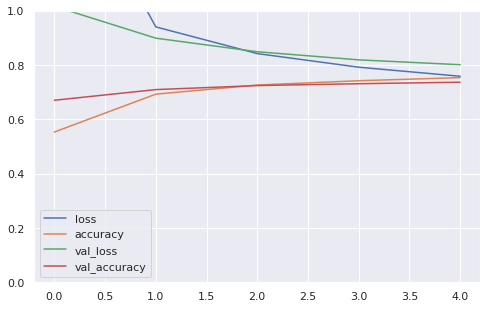

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history_pretrained_resnet.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Because GPU-Memory not enough we'll save model and load it again with empty memory

In [18]:
keras.models.save_model(model,"pretrained_cifar100_resnet_v3.h5")

In [12]:
model = keras.models.load_model("pretrained_cifar100_resnet_v3.h5")

In [15]:
test_data = configure_data(test_data)
test_data = test_data.map(preprocess_resnet)
model.evaluate(test_data)

313/313 [==============================] - 40s 127ms/step - loss: 0.7974 - accuracy: 0.7385


[0.7973619103431702, 0.7384999990463257]

### Fine tuning model

In [16]:
for layer in model.layers:
    layer.trainable = True

In [17]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,metrics=["accuracy"])
history_pretrained_resnet = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
1407/1407 [==============================] - 477s 339ms/step - loss: 0.9330 - accuracy: 0.7022 - val_loss: 0.6205 - val_accuracy: 0.7956
Epoch 2/5
1407/1407 [==============================] - 483s 343ms/step - loss: 0.3707 - accuracy: 0.8835 - val_loss: 0.5645 - val_accuracy: 0.8206
Epoch 3/5
1407/1407 [==============================] - 483s 343ms/step - loss: 0.2439 - accuracy: 0.9292 - val_loss: 0.5589 - val_accuracy: 0.8262
Epoch 4/5
1407/1407 [==============================] - 457s 325ms/step - loss: 0.1803 - accuracy: 0.9507 - val_loss: 0.5568 - val_accuracy: 0.8278
Epoch 5/5
1407/1407 [==============================] - 454s 323ms/step - loss: 0.1449 - accuracy: 0.9638 - val_loss: 0.5588 - val_accuracy: 0.8300


In [19]:
#Continute training
history_pretrained_resnet = model.fit(train_data, epochs=15, validation_data=valid_data)

Epoch 1/15
1407/1407 [==============================] - 437s 310ms/step - loss: 0.1182 - accuracy: 0.9734 - val_loss: 0.5675 - val_accuracy: 0.8294
Epoch 2/15
1407/1407 [==============================] - 438s 311ms/step - loss: 0.1021 - accuracy: 0.9781 - val_loss: 0.5681 - val_accuracy: 0.8318
Epoch 3/15
1407/1407 [==============================] - 439s 312ms/step - loss: 0.0864 - accuracy: 0.9834 - val_loss: 0.5737 - val_accuracy: 0.8334
Epoch 4/15
1407/1407 [==============================] - 439s 312ms/step - loss: 0.0768 - accuracy: 0.9868 - val_loss: 0.5763 - val_accuracy: 0.8332
Epoch 5/15
1407/1407 [==============================] - 439s 312ms/step - loss: 0.0691 - accuracy: 0.9890 - val_loss: 0.5839 - val_accuracy: 0.8336
Epoch 6/15
1407/1407 [==============================] - 439s 312ms/step - loss: 0.0642 - accuracy: 0.9898 - val_loss: 0.5829 - val_accuracy: 0.8334
Epoch 7/15
1407/1407 [==============================] - 439s 312ms/step - loss: 0.0589 - accuracy: 0.9922 - val_

In [21]:
test_data = configure_data(test_data)
test_data = test_data.map(preprocess_resnet)
model.evaluate(test_data)

313/313 [==============================] - 39s 123ms/step - loss: 0.6628 - accuracy: 0.8214


[0.6628488302230835, 0.821399986743927]